# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment.

In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
train_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
test_data=pd.read_csv('test.csv')

In [5]:
test_data.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [6]:
# Train and test datasets are being concatenated, because I will need the past in order to predict the future based on 
# some possible patterns that occured in the past.

data = pd.concat([train_data, test_data], sort=False)

In [7]:
data.head()

,date,store,item,sales,id
0,2013-01-01,1,1,13.0,NaN
1,2013-01-02,1,1,11.0,NaN
2,2013-01-03,1,1,14.0,NaN
3,2013-01-04,1,1,13.0,NaN
4,2013-01-05,1,1,10.0,NaN


In [8]:
#Converting 'date' object datatype to datetime datatype
train_data['date'] = pd.to_datetime(train_data['date'], format="%Y-%m-%d")
test_data['date'] = pd.to_datetime(test_data['date'], format="%Y-%m-%d")
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")

In [9]:
# data = data.set_index('date')

# Checking the basic details of the dataset

In [10]:
train_data.shape

(913000, 4)

In [11]:
test_data.shape

(45000, 4)

In [12]:
data.shape

(958000, 5)

In [13]:
# Time Range
train_data["date"].min(), train_data["date"].max(), test_data["date"].min(), test_data["date"].max()

(Timestamp('2013-01-01 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-03-31 00:00:00'))

In [14]:
# How many items are in the store?
data.groupby(["store"])["item"].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

In [15]:
# Summary Stats for each store
data.groupby(["store"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                                    
       count        sum       mean median        std  min    max
store                                                           
1      91300  4315603.0  47.268379   44.0  24.006252  1.0  155.0
2      91300  6120128.0  67.033165   62.0  33.595810  3.0  231.0
3      91300  5435144.0  59.530602   55.0  29.974102  3.0  196.0
4      91300  5012639.0  54.902946   51.0  27.733097  4.0  186.0
5      91300  3631016.0  39.770164   37.0  20.365757  2.0  130.0
6      91300  3627670.0  39.733516   37.0  20.310451  0.0  134.0
7      91300  3320009.0  36.363735   34.0  18.684825  1.0  122.0
8      91300  5856169.0  64.142048   60.0  32.231751  4.0  204.0
9      91300  5025976.0  55.049025   51.0  27.832186  4.0  195.0
10     91300  5360158.0  58.709288   54.0  29.554994  3.0  187.0

In [16]:
# Summary Stats for each item
data.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                                     
      count        sum       mean median        std   min    max
item                                                            
1     18260   401384.0  21.981599   21.0   8.468922   1.0   59.0
2     18260  1069564.0  58.574151   56.0  20.093015   9.0  150.0
3     18260   669087.0  36.642223   35.0  13.179441   7.0  104.0
4     18260   401907.0  22.010241   21.0   8.403898   0.0   66.0
5     18260   335230.0  18.358708   18.0   7.265167   1.0   50.0
6     18260  1068281.0  58.503888   56.0  20.174898  11.0  148.0
7     18260  1068777.0  58.531051   56.0  20.146002  11.0  141.0
8     18260  1405108.0  76.950055   74.0  26.130697  15.0  181.0
9     18260   938379.0  51.389869   49.5  17.790158   6.0  134.0
10    18260  1337133.0  73.227437   70.0  24.823725  14.0  175.0
11    18260  1271925.0  69.656353   67.0  23.744732  11.0  170.0
12    18260  1271534.0  69.634940   67.0  23.738663  12.0  170.0
13    18260  1539621.0  84.316594   81.0  28.311031  20.0  210.0
14    18260  1071531.0  58.681873   56.0  20.079860  12.0  152.0
15    18260  1607442.0  88.030778   85.0  29.522852  17.0  231.0
16    18260   468480.0  25.656079   25.0   9.603270   2.0   70.0
17    18260   602486.0  32.994852   32.0  11.967610   4.0   83.0
18    18260  1538876.0  84.275794   81.0  28.430621  18.0  208.0
19    18260   736892.0  40.355531   39.0  14.332645   5.0   99.0
20    18260   867641.0  47.515936   46.0  16.490487   9.0  127.0
21    18260   736190.0  40.317087   39.0  14.338006   7.0  109.0
22    18260  1469971.0  80.502245   78.0  27.118163  14.0  214.0
23    18260   534979.0  29.297864   28.0  10.819549   3.0   81.0
24    18260  1205975.0  66.044633   64.0  22.531555  14.0  156.0
25    18260  1473334.0  80.686418   78.0  27.238817  18.0  193.0
26    18260   869981.0  47.644085   46.0  16.723912   8.0  119.0
27    18260   402628.0  22.049726   21.0   8.461641   1.0   59.0
28    18260  1604713.0  87.881325   85.0  29.501781  16.0  206.0
29    18260  1271240.0  69.618839   67.0  23.635631  15.0  173.0
30    18260   736554.0  40.337021   39.0  14.363331   5.0  115.0
31    18260  1070845.0  58.644304   57.0  20.104705  10.0  159.0
32    18260   803107.0  43.981763   42.0  15.574556   5.0  119.0
33    18260  1270183.0  69.560953   67.0  23.718343  15.0  169.0
34    18260   469935.0  25.735761   25.0   9.617910   2.0   79.0
35    18260  1201541.0  65.801807   63.0  22.461990  12.0  168.0
36    18260  1406548.0  77.028916   74.0  26.067440  16.0  188.0
37    18260   534258.0  29.258379   28.0  10.771547   3.0   74.0
38    18260  1470330.0  80.521906   77.0  27.141799  15.0  188.0
39    18260   801311.0  43.883406   42.0  15.511550   7.0  112.0
40    18260   534094.0  29.249398   28.0  10.822959   3.0   74.0
41    18260   401759.0  22.002136   21.0   8.402470   2.0   60.0
42    18260   669925.0  36.688116   35.0  13.215112   5.0   96.0
43    18260   936635.0  51.294359   49.0  17.801008   9.0  126.0
44    18260   536811.0  29.398193   28.0  10.797738   3.0   78.0
45    18260  1471467.0  80.584173   78.0  27.318402  18.0  205.0
46    18260  1070764.0  58.639869   56.0  20.220879  11.0  150.0
47    18260   401781.0  22.003341   21.0   8.420102   2.0   61.0
48    18260   937703.0  51.352848   49.0  17.881917   8.0  130.0
49    18260   535663.0  29.335323   28.0  10.874788   3.0   77.0
50    18260  1203009.0  65.882202   63.0  22.416031  12.0  164.0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    958000 non-null  datetime64[ns]
 1   store   958000 non-null  int64         
 2   item    958000 non-null  int64         
 3   sales   913000 non-null  float64       
 4   id      45000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 43.9 MB


In [18]:
data.describe()

,store,item,sales,id
count,958000.000000,958000.000000,913000.000000,45000.000000
mean,5.500000,25.500000,52.250287,22499.500000
std,2.872283,14.430877,28.801144,12990.525394
min,1.000000,1.000000,0.000000,0.000000
25%,3.000000,13.000000,30.000000,11249.750000
50%,5.500000,25.500000,47.000000,22499.500000
75%,8.000000,38.000000,70.000000,33749.250000
max,10.000000,50.000000,231.000000,44999.000000


In [19]:
data.nunique()

date      1916
store       10
item        50
sales      213
id       45000
dtype: int64

# Exploratory Data Analysis(EDA)

# a)Univariate Analysis(Analysis using one variable)

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


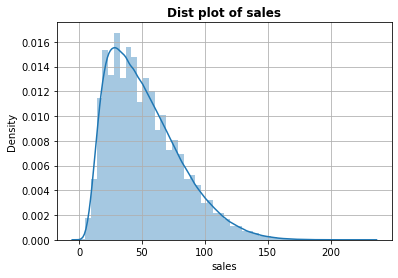

In [20]:
sns.distplot(data['sales'])
plt.title('Dist plot of sales',fontweight="bold")
plt.grid()

In [21]:
#Maximum number of items sold at a particular store on a particular date is above 200

# b)Bi/Multivariate Analysis(Analysis using two or more than two variables)


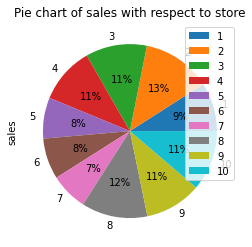

In [22]:
data.groupby(['store']).sum().plot(kind='pie',y='sales',autopct='%1.0f%%',title='Pie chart of {} with respect to {}'.format('sales','store')) 
plt.show() 

In [23]:
#Store 2 has maximum sale of 13% compared to other stores

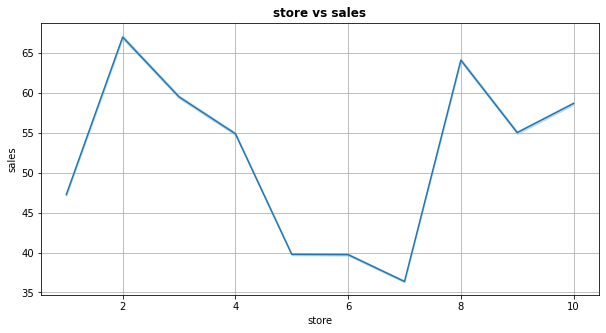

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_data,x='store',y='sales')
plt.title('store vs sales',fontweight="bold")
plt.grid()

In [25]:
#From the visualization, it is clear that the stores with ID 2 and 8 have higher average sales than the remaining stores and is a clear indication that they are doing good money!
#Whereas store with ID 7 has very poor performance in terms of average sales.

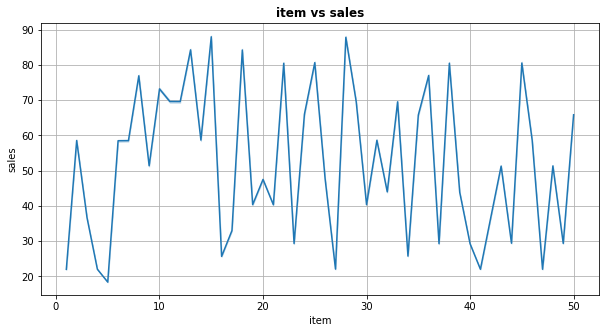

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_data,x='item',y='sales')
plt.title('item vs sales',fontweight="bold")
plt.grid()

In [27]:
#Top items with highest average sale are 15, 28, 13, 18 and with least average sales are 5, 1, 41 and so on.

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'item'}>],
       [<AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>]],
      dtype=object)

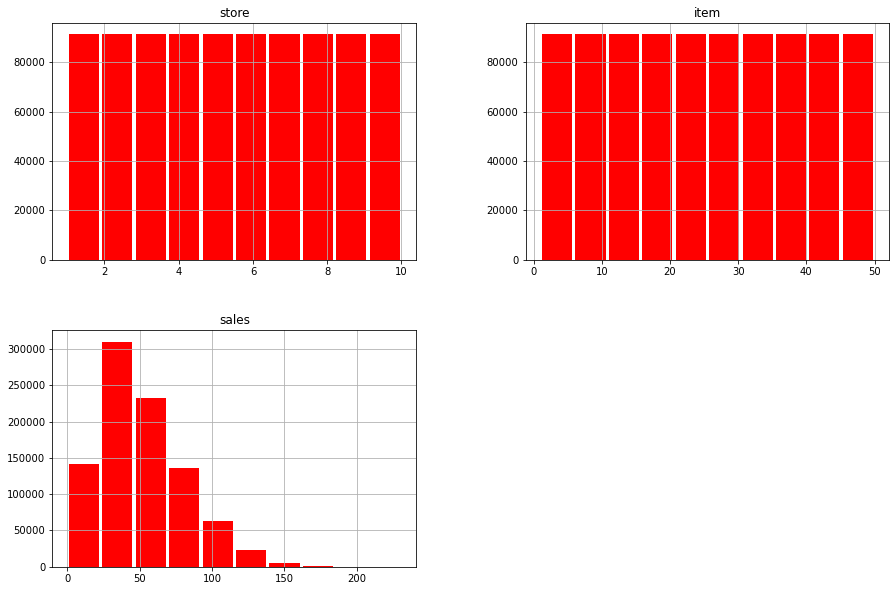

In [28]:
freqgraph=train_data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(15,10),rwidth=0.9,color='red')

# Preprocessing

# a)Handling missing values

In [29]:
#Checking for null values
train_data.isna().sum().to_frame().style.bar(color="red")

,0
date,0
store,0
item,0
sales,0


In [30]:
test_data.isna().sum().to_frame().style.bar(color="red")

,0
id,0
date,0
store,0
item,0


In [31]:
#No missing values found for both the train and test dataset

# b)Handling Outlier

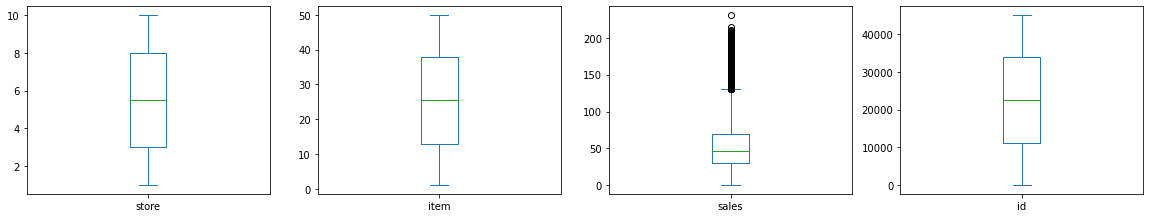

In [32]:
data.plot(kind="box",subplots=True,layout=(5,4),figsize=(20,20))
plt.show()

In [33]:
#From the boxplot we can see that sales column has outliers
#But if we remove the outliers which are greater than upper limit then we will remove the data of those stores and items which have more sales
#So it is better to keep the outliers of sales

# c)Feature Engineering

In [34]:
#In order to search for seasonalities, date variable will be used to derive new features and different time periods will be created.
def create_date_features(data):
    data['month'] = data.date.dt.month
    data['day_of_month'] = data.date.dt.day
    data['day_of_year'] = data.date.dt.dayofyear
    data['week_of_year'] = data.date.dt.weekofyear
    # 1.1.2013 is Tuesday, so our starting point is the 2nd day of week
    data['day_of_week'] = data.date.dt.dayofweek + 1
    data['year'] = data.date.dt.year
    data["is_wknd"] = data.date.dt.weekday // 4
    data['is_month_start'] = data.date.dt.is_month_start.astype(int)
    data['is_month_end'] = data.date.dt.is_month_end.astype(int)
    return data

In [35]:
data = create_date_features(data)
data.head()

/var/folders/5r/zxv696r558jf09kl_8b9gyvr0000gn/T/ipykernel_2821/2936016148.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['week_of_year'] = data.date.dt.weekofyear


,date,store,item,sales,id,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
0,2013-01-01,1,1,13.0,NaN,1,1,1,1,2,2013,0,1,0
1,2013-01-02,1,1,11.0,NaN,1,2,2,1,3,2013,0,0,0
2,2013-01-03,1,1,14.0,NaN,1,3,3,1,4,2013,0,0,0
3,2013-01-04,1,1,13.0,NaN,1,4,4,1,5,2013,1,0,0
4,2013-01-05,1,1,10.0,NaN,1,5,5,1,6,2013,1,0,0


In [36]:
data.set_index('date',inplace=True)

In [37]:
data.shape

(958000, 13)

<AxesSubplot:xlabel='year'>

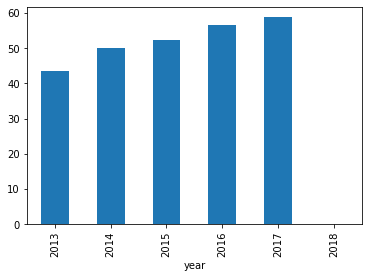

In [38]:
data.groupby('year')['sales'].mean().plot.bar()

In [39]:
#sales shows a linear graph, as year increases sales also increases

<AxesSubplot:xlabel='month'>

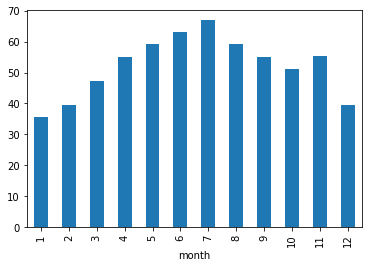

In [40]:
data.groupby('month')['sales'].mean().plot.bar()

In [41]:
#From the plot we can see that sales increases gradually and reaches its peak on July month and decreases thereafter

<AxesSubplot:xlabel='is_wknd'>

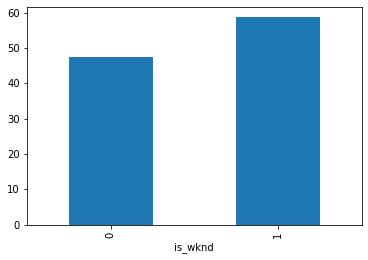

In [42]:
data.groupby('is_wknd')['sales'].mean().plot.bar()

In [43]:
#It can be inferred from the above plot that the sales is more on weekends as compared to weekdays

<AxesSubplot:xlabel='day_of_week'>

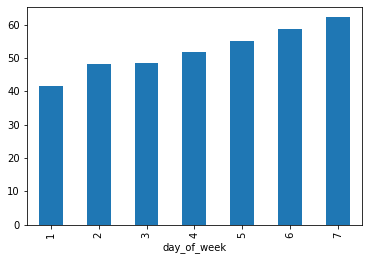

In [44]:
data.groupby('day_of_week')['sales'].mean().plot.bar()

In [45]:
#Least sales on Monday and highest sales on Sunday

# d)Encoding

In [46]:
data.nunique()

store                10
item                 50
sales               213
id                45000
month                12
day_of_month         31
day_of_year         366
week_of_year         53
day_of_week           7
year                  6
is_wknd               2
is_month_start        2
is_month_end          2
dtype: int64

In [47]:
#Won't be using features such as "day_of_year" for one hot encoding, it would derive 365 features which won't be helpful for the model.

In [48]:
data = pd.get_dummies(data, columns=['store', 'item', 'day_of_week','month'])

In [49]:
data.shape

(958000, 88)

In [50]:
data.head()

,sales,id,day_of_month,day_of_year,week_of_year,year,is_wknd,is_month_start,is_month_end,store_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,13.0,NaN,1,1,1,2013,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-02,11.0,NaN,2,2,1,2013,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-03,14.0,NaN,3,3,1,2013,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-04,13.0,NaN,4,4,1,2013,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-05,10.0,NaN,5,5,1,2013,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# e) Feature Reduction


In [51]:
corr_matrix = data.corr()
corr_matrix["sales"].sort_values(ascending = False)

sales            1.000000
is_wknd          0.192659
year             0.182360
item_15          0.177476
item_28          0.176734
                   ...   
day_of_week_1   -0.153086
item_5          -0.168106
month_1         -0.176870
store_7         -0.183865
id                    NaN
Name: sales, Length: 88, dtype: float64

In [52]:
#values which are close to +1 show a very strong positive correaltion with the target variable,i.e directly proportional 
#The values close to -1 it shows a strong negative correlation ,i.e inversely proportional. 
#For values lying near zero show that there is no linear correlation with the variable.

<AxesSubplot:>

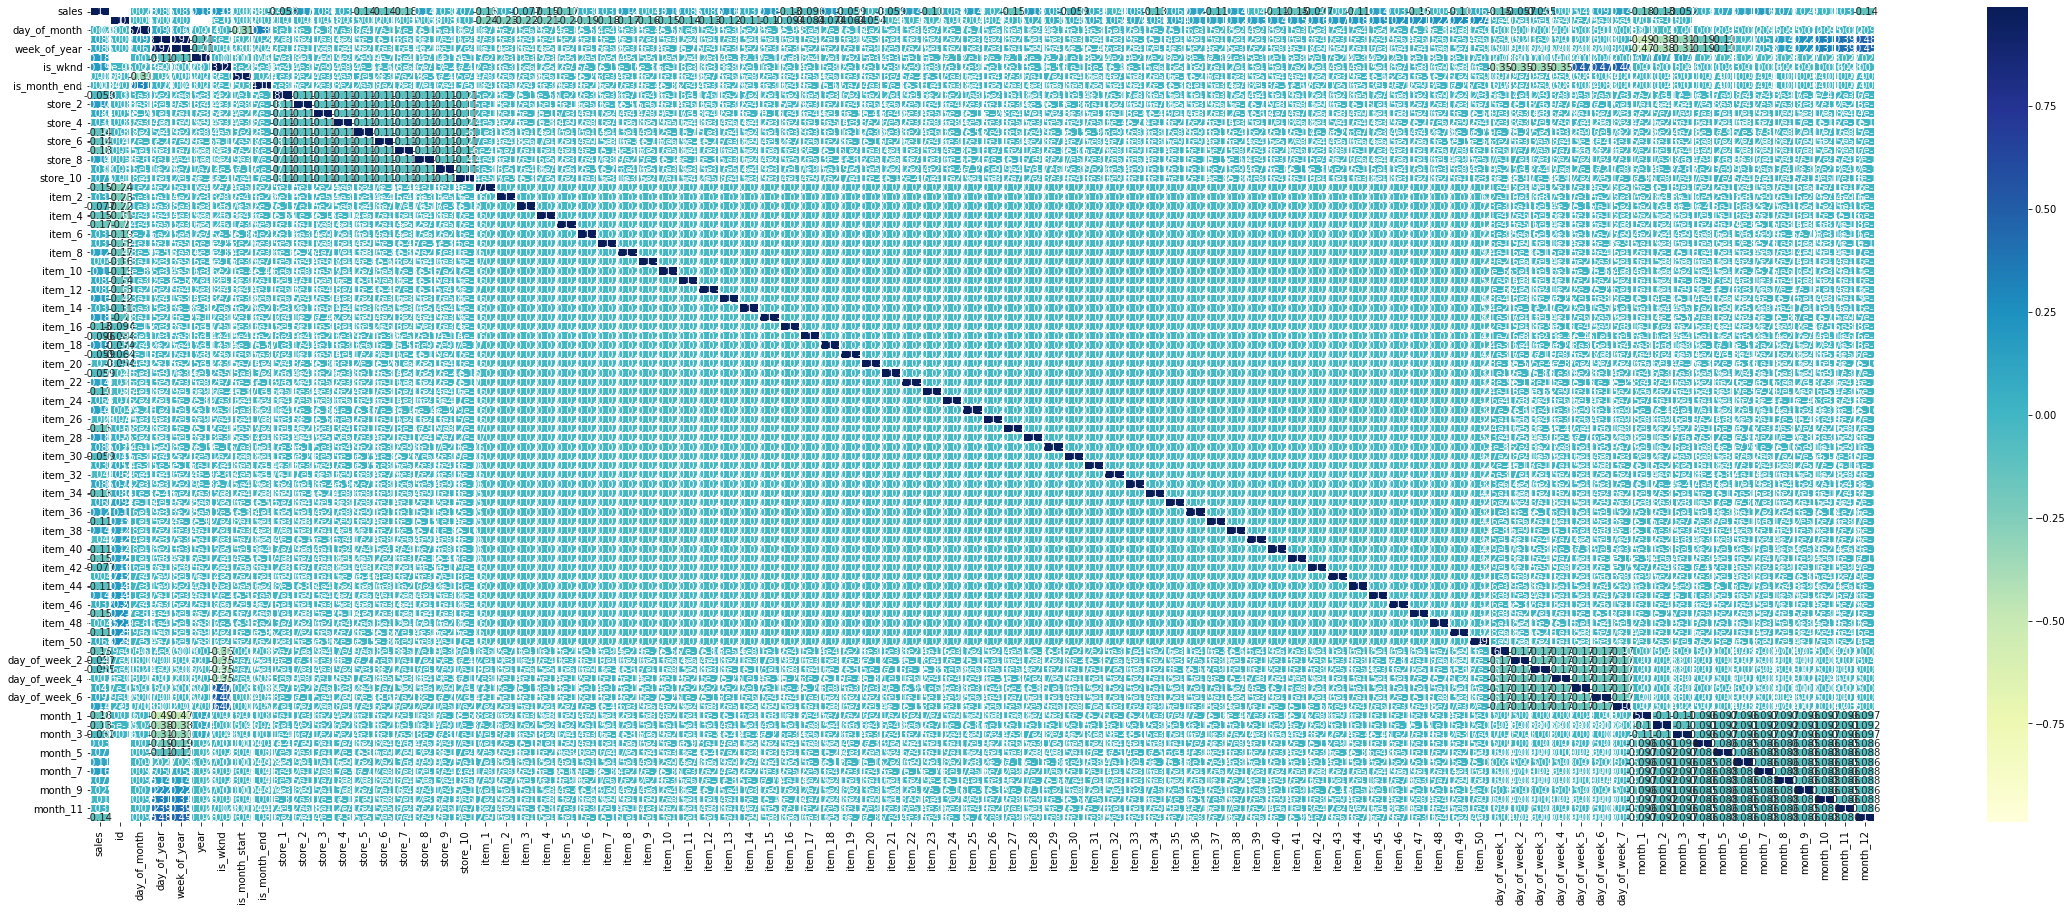

In [53]:
plt.figure(figsize=(40,15))
sns.heatmap(data.corr(),vmin = -0.99,vmax = 0.99,cmap='YlGnBu',linewidths =0.1,annot=True)

In [54]:
#Since there is no high correlation with the target variable not removing any columns.

# Modelling

In [55]:
#checking for stationarity

<Figure size 432x288 with 0 Axes>

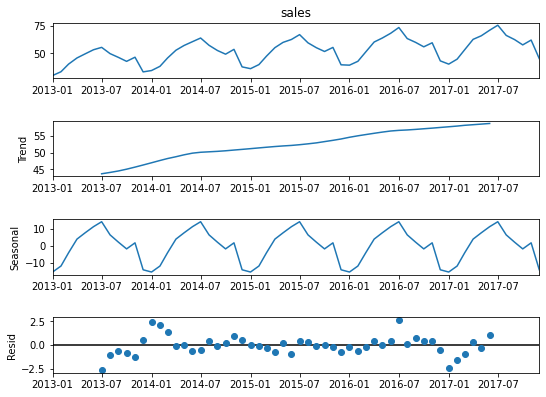

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
train_plot = train_data.set_index('date')
sales = train_plot['sales'].resample('MS').mean() 

result = seasonal_decompose(sales, model='additive')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(8, 6)

In [57]:
#Playing with a few frequency, the yearly pattern is very obvious. and also we can see a upwards trend. Which means this data is not stationary.
#1st graph: the dataset is not stationary, it would be easier to have a future prediction simply by taking mean values if it was stationary,
#2nd graph: there is an increasing trend over time,
#3rd graph: a repeating pattern is observed, so there is seasonality- moving upwards on July.
#4th graph: residuals are decomposing randomly around 0, so the series is additive.

In [58]:
from statsmodels.tsa.stattools import adfuller

In [59]:
#Ho: It is non stationary
#H1: It is stationary

#Perform Dickey-Fuller test:
def test_stationarity(sales, window = 12, cutoff = 0.05):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(sales, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary' % pvalue)
    else:
        print('p-value = %.4f. weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ' % pvalue)
    
    print(dfoutput)

In [60]:
test_stationarity(sales)

Results of Dickey-Fuller Test:
p-value = 0.5738. weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Test Statistic                 -1.417665
p-value                         0.573779
#Lags Used                     18.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


# Differencing

In [61]:
train_data['Seasonal First Difference']=train_data['sales']-train_data['sales'].shift(12)


In [62]:
## Again test dickey fuller test
test_stationarity(train_data['Seasonal First Difference'].dropna())

Results of Dickey-Fuller Test:
p-value = 0.0000. strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Test Statistic                   -156.664633
p-value                             0.000000
#Lags Used                         20.000000
Number of Observations Used    912967.000000
Critical Value (1%)                -3.430357
Critical Value (5%)                -2.861543
Critical Value (10%)               -2.566772
dtype: float64


# Auto Regressive Model


In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

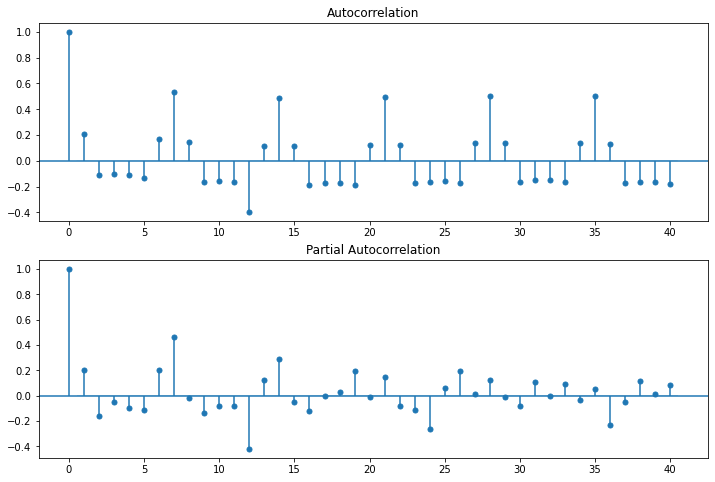

In [64]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
model=sm.tsa.statespace.SARIMAX(train_data['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12280D+00    |proj g|=  1.28722D-01


 This problem is unconstrained.



At iterate    5    f=  3.95773D+00    |proj g|=  1.08793D-01

At iterate   10    f=  3.82915D+00    |proj g|=  5.68580D-03

At iterate   15    f=  3.82865D+00    |proj g|=  1.68174D-02

At iterate   20    f=  3.82687D+00    |proj g|=  3.85426D-03

At iterate   25    f=  3.82651D+00    |proj g|=  1.98822D-04

At iterate   30    f=  3.82647D+00    |proj g|=  3.04440D-03

At iterate   35    f=  3.82646D+00    |proj g|=  1.21725D-03

At iterate   40    f=  3.82645D+00    |proj g|=  5.38311D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     64      1     0     0   8.912D-05   3.826D+00
  F =   3.82645382649

In [ ]:
train_data['forecast']=results.predict('2018-01-01','2018-03-31',dynamic=True)
train_data[['sales','forecast']].plot(figsize=(12,8))
